<a href="https://colab.research.google.com/github/imdressel/wrangling/blob/main/assignment/assignment_mysolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

The paper is about a framework for data tidying, in which datasets have a specific structure, with each variable as a column, each observation as a row, and each type of observational unit as a table. The proposed structure supports the development of tidy tools for data analysis. The advantages of this method are discussed using a case study.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The tidy data standard is intended to structure datasets to facilitate the initial exploration and analysis of the data and to make it easier to develop data analysis tools that work well together. In turn, this allows us to focus on the problem of interest rather than data logistics. Th tidy data standard standardizes data cleaning with steps/guidelines that are generally required.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first sentence means that datasets that are considered tidy have a similar structure and adhere to similar guidelines. However, there are many wasy that datasets can be messy, and because of this, datasets tend to be messy in their own ways. Messy datasets are often made out of convenience to the original creator.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values are usually numbers or strings that belong to a variable and an observation. The dataset consists of a collection of values.

Variables are collections of values that measure the same underlying attribute across units. For example, this could be temperature, height, or duration. One example value for temperature could be 70.

Observations contain all values measured on the same unit across attributes. For example, the observation could be values for temperature measured on a day.

  5. How is "Tidy Data" defined in section 2.3?

Tidy data is defined as a dataset where (1)each variable forms a column, (2) each observation forms a row, and (3) each type of observational unit forms a table. If data is not tidy, it is considered messy.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The 5 most common problems are: column headers are values, not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiple types of obseravtional units are stored in the same table; and a single observational unit is stored in multiple tables.

The data in Table 4 are messy because the columns represent values of the income variable. Instead, this should be shown as an income column alongside religion, and the last column should be frequency.

Melting a dataset is when we convert the column-value variables into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 has days as columns, when they are values of the variable date. Table 12 is molten because the days are converted into rows of the date column. In Table 12a, the data are still not tidy because of the element and value rows. tmin and tmax are variables and not values, so they need separate columns. This is done in the tidied version in Table 12b, wjere tmin and tmax are columns that hold rows of their given values.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The issue is that tidy data is only as useful as the tools we use to work with it. Because of this, tidy tools can become linked to the tidy framework, causing a cycle that is difficult to break to improve a workflow. In other words, using the tidy framework alone may only benefit the use of certain tools. Wickham hopes that thsi framework improves data science more broadly to create better strategies and tools. Essentially, the tidy framework needs to be linked to a broader improvement in data science.


**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [1]:
! git clone https://github.com/imdressel/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 65 (delta 20), reused 11 (delta 9), pack-reused 35
Receiving objects: 100% (65/65), 6.28 MiB | 23.64 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./wrangling/assignment/data/airbnb_hw.csv',low_memory=False)

In [4]:
print(df.shape,'\n')
print(df.dtypes,'\n')
df.head()

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
price = df['Price']
print(price.unique())
print(f'Min price:  {np.min(price)}')
print(f'Max price:  {np.max(price)}')

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

From this, we can see that price was imported as a string. This is becasue values in the thousands have a comma separator. We need to remove this to convert the data to values

In [6]:
price = df['Price'] # so we re-extract the price data every time
price = price.str.replace(',','') # removing the commas
# view the result
print(price.unique(),'\n')
# issue has been resolved

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

In [7]:
# now, we can cast the price variable to float/numeric
price = pd.to_numeric(price)

In [8]:
print(price.unique(),'\n')
print( 'Total missing: ', sum( price.isnull() ) )

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119    62   

View the cleaned data

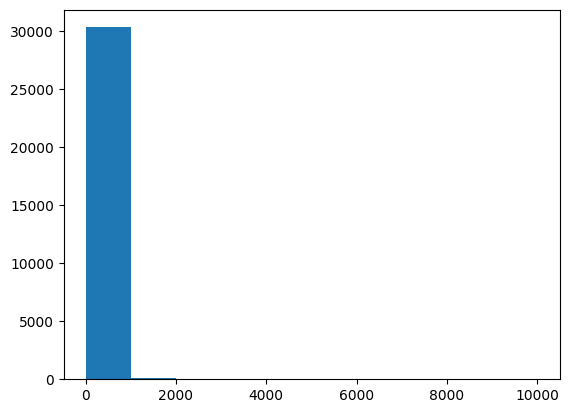

In [9]:
plt.hist(price)
plt.show()

2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

In [10]:
del df

In [11]:
df = pd.read_csv('./wrangling/assignment/data/sharks.csv',low_memory=False)
df.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
type = df['Type']
type.value_counts()

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64

In [13]:
# there are several variables that we can replace with NaN (questionable, unconfirmed, unverified, under investigation, invalid)
type = type.replace(['Invalid','Questionable','Unconfirmed','Unverified','Under investigation'],np.nan)
# there are more types that fall under the category of watercraft. these are sea disaster boat, boating, boatong
type = type.replace(['Sea Disaster','Boat','Boating','Boatomg'],'Watercraft') # Boatomg appears to be a typo?

# display the result
type.value_counts()

Unprovoked    4716
Provoked       593
Watercraft     583
Name: Type, dtype: int64

In [14]:
# replace the type variable in the original dataframe with the version that is cleaned
df['Type'] = type

df['Type'].value_counts() # confirm

Unprovoked    4716
Provoked       593
Watercraft     583
Name: Type, dtype: int64

In [15]:
del type
del df

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [16]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

In [17]:
df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [18]:
release = df['WhetherDefendantWasReleasedPretrial']
print(release.unique(),'\n')
print(release.value_counts(),'\n')

[9 0 1] 

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [19]:
# based on the codebook, we know we need to replace the 9s with NaN
release = release.replace(9,np.nan)

In [20]:
print(release.value_counts(),'\n')

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [21]:
# count the missing values
sum(release.isnull()) # this is correct

31

In [22]:
df['WhetherDefendantWasReleasedPretrial'] = release # replace the data column with the cleaned data
df['WhetherDefendantWasReleasedPretrial'].value_counts()

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [23]:
del release

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [24]:
sentence = df['ImposedSentenceAllChargeInContactEvent']
stype = df['SentenceTypeAllChargesAtConvictionInContactEvent']

print(sentence.unique(),'\n')
print(stype.unique(),'\n')

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [25]:
# we need to make sentence numeric. right now, there are missing values denoted ' '
sentence = pd.to_numeric(sentence,errors='coerce') # coercing to numeric
# now, we can create a missing dummy variable
sentence_NA = sentence.isnull()
print(np.sum(sentence_NA),'\n') # there are 9053 missing values

9053 



In [26]:
print(pd.crosstab(sentence_NA,stype),'\n') # the charges were dismissed for category 4

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 



In [27]:
# we need to replace sentence with 0 when the type is 4
# we also need to replace sentence with np.nan when the type is 9
sentence = sentence.mask(stype==4,0)
sentence = sentence.mask(stype==9,np.nan)


In [28]:
# creating a new missing dummy variable
sentence_NA = sentence.isnull()
print(pd.crosstab(sentence_NA, stype), '\n')
print(np.sum(sentence_NA),'\n') # there are only 274 missing now

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

274 



In [29]:
# add the cleaned data to the df
df['ImposedSentenceAllChargeInContactEvent'] = sentence
print(df['ImposedSentenceAllChargeInContactEvent'].unique(),'\n')

[           nan 6.00000000e+01 1.20000000e+01 9.85626283e-01
 0.00000000e+00 3.60000000e+01 6.00000000e+00 2.40000000e+01
 5.91375770e+00 1.20000000e+02 7.20000000e+01 1.19917864e+01
 2.95687885e+00 8.40000000e+01 1.08000000e+02 3.00000000e+02
 2.40000000e+02 1.80000000e+02 4.00000000e+00 9.60000000e+01
 2.00000000e+00 5.40000000e+01 3.28542094e-01 4.40000000e+01
 5.00000000e+00 1.15000000e+02 1.32000000e+02 4.80000000e+01
 2.58000000e+02 3.40000000e+01 7.60000000e+01 1.64271047e-01
 1.31416838e-01 1.11000000e+02 9.00000000e+00 3.00000000e+00
 1.97125257e+00 3.69856263e+01 6.57084189e-02 3.54928131e+01
 1.06492813e+02 8.00000000e+00 3.50000000e+01 1.83141684e+01
 4.80000000e+02 3.20000000e+01 9.30000000e+01 2.34000000e+02
 7.32000000e+02 1.16427105e+00 4.65708419e+00 2.10000000e+01
 7.00000000e+00 4.49281314e+00 1.80000000e+01 6.00000000e+02
 4.31642710e+01 1.79000000e+02 5.20000000e+01 3.00000000e+01
 2.00000000e+01 1.92000000e+02 7.02000000e+02 1.40000000e+01
 5.50000000e+01 5.300000

In [30]:
del sentence
del stype

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?